In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud
from PIL import Image
from spacy.lang.es.stop_words import STOP_WORDS

In [2]:
df_routines = pd.read_csv('../data/routines.csv')
df_comedians = pd.read_csv('../data/comedians.csv')

df_routines['DATE'] = pd.to_datetime(df_routines['DATE'])
df_comedians['BIRTHDATE'] = pd.to_datetime(df_comedians['BIRTHDATE'], format='mixed')

In [3]:
df_routines

,ID,EVENT,VERSION,YEAR,TV,DATE,SHOWID,VIDEO
0,1,Festival Internacional de la Canción de Viña d...,I,1960,NaN,1960-02-21,1,NaN
1,2,Festival Internacional de la Canción de Viña d...,I,1960,NaN,1960-02-21,2,NaN
2,3,Festival Internacional de la Canción de Viña d...,I,1960,NaN,1960-02-21,3,NaN
3,4,Festival Internacional de la Canción de Viña d...,I,1960,NaN,1960-02-21,4,NaN
4,5,Festival Internacional de la Canción de Viña d...,II,1961,NaN,1961-02-11,2,NaN
...,...,...,...,...,...,...,...,...
197,198,Festival Internacional de la Canción de Viña d...,LXIII,2024,"Canal 13, TVN",2024-02-26,99,https://www.youtube.com/watch?v=Z4nhHJuBCi4
198,199,Festival Internacional de la Canción de Viña d...,LXIII,2024,"Canal 13, TVN",2024-02-27,107,https://www.youtube.com/watch?v=4dZs8JX1XYY
199,200,Festival Internacional de la Canción de Viña d...,LXIII,2024,"Canal 13, TVN",2024-02-28,108,https://www.youtube.com/watch?v=Qs2noQccx6A
200,201,Festival Internacional de la Canción de Viña d...,LXIII,2024,"Canal 13, TVN",2024-02-29,94,https://www.youtube.com/watch?v=fdyijhv7_rg


In [4]:
df_comedians

,ID,SHOWID,NAME,NATIONALITY,BIRTHDATE,GENDER
0,1,93,Alejandra Azcárate,Colombia,1978-03-03,female
1,2,109,Alex Ortiz,Chile,1986-09-26,male
2,3,92,Alison Mandel,Chile,1983-07-05,female
3,4,51,Álvaro Salas,Chile,1952-12-27,male
4,5,23,Armando Navarrete,Chile,1934-02-28,male
...,...,...,...,...,...,...
124,125,94,Sergio Freire,Chile,1980-10-03,male
125,126,64,Stefan Kramer,Chile,1982-02-19,male
126,127,10,Héctor Cifuentes,Chile,1925-10-14,male
127,128,59,Vanessa Miller,Chile,1965-11-02,female


In [5]:
df = pd.merge(df_routines, df_comedians[['SHOWID', 'NAME', 'BIRTHDATE', 'GENDER']], left_on='SHOWID', right_on='SHOWID')

In [6]:
df

,ID,EVENT,VERSION,YEAR,TV,DATE,SHOWID,VIDEO,NAME,BIRTHDATE,GENDER
0,1,Festival Internacional de la Canción de Viña d...,I,1960,NaN,1960-02-21,1,NaN,Carlos Helo,1929-06-29,male
1,2,Festival Internacional de la Canción de Viña d...,I,1960,NaN,1960-02-21,2,NaN,Jorge Romero,1929-11-02,male
2,3,Festival Internacional de la Canción de Viña d...,I,1960,NaN,1960-02-21,3,NaN,Luis Sandrini,1905-02-22,male
3,4,Festival Internacional de la Canción de Viña d...,I,1960,NaN,1960-02-21,4,NaN,Manuel Carrasco,1918-11-03,male
4,5,Festival Internacional de la Canción de Viña d...,II,1961,NaN,1961-02-11,2,NaN,Jorge Romero,1929-11-02,male
...,...,...,...,...,...,...,...,...,...,...,...
227,198,Festival Internacional de la Canción de Viña d...,LXIII,2024,"Canal 13, TVN",2024-02-26,99,https://www.youtube.com/watch?v=Z4nhHJuBCi4,Javiera Contador,1974-06-17,female
228,199,Festival Internacional de la Canción de Viña d...,LXIII,2024,"Canal 13, TVN",2024-02-27,107,https://www.youtube.com/watch?v=4dZs8JX1XYY,Luis Slimming,1987-07-11,male
229,200,Festival Internacional de la Canción de Viña d...,LXIII,2024,"Canal 13, TVN",2024-02-28,108,https://www.youtube.com/watch?v=Qs2noQccx6A,Lucho Miranda,1995-01-30,male
230,201,Festival Internacional de la Canción de Viña d...,LXIII,2024,"Canal 13, TVN",2024-02-29,94,https://www.youtube.com/watch?v=fdyijhv7_rg,Sergio Freire,1980-10-03,male


In [7]:
df['age'] = round((df['DATE'] - df['BIRTHDATE']).dt.days/365, 0)
df['decade'] = df['DATE'].dt.year // 10 * 10
df['quinquennial'] = df['DATE'].dt.year // 5 * 5

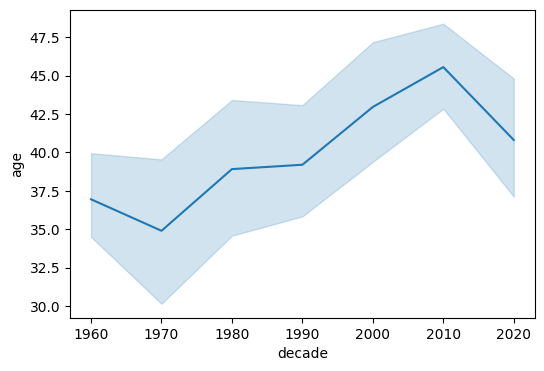

In [8]:
fig ,ax = plt.subplots(figsize = (6,4))
sns.lineplot(data=df, x="decade", y="age", ax=ax)
plt.savefig('../images/age_line_plot.png', bbox_inches='tight', dpi=300)
plt.show()

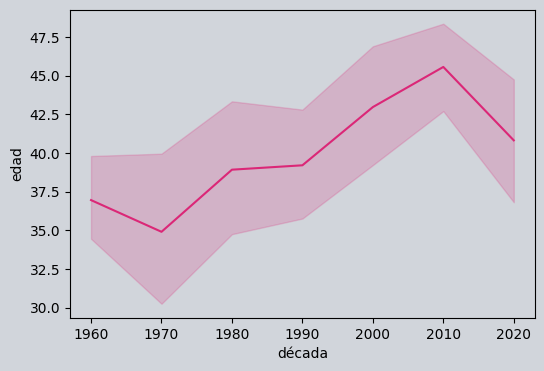

In [9]:
fig ,ax = plt.subplots(figsize = (6,4))
sns.lineplot(data=df, x="decade", y="age", ax=ax, color="#db2777")
fig.patch.set_facecolor('#d1d5db')
ax.set_facecolor('#d1d5db')
ax.set_xlabel('década')
ax.set_ylabel('edad')
plt.savefig('../images/age_line_plot_spanish.png', bbox_inches='tight', dpi=300)
plt.show()

<Axes: xlabel='quinquennial', ylabel='age'>

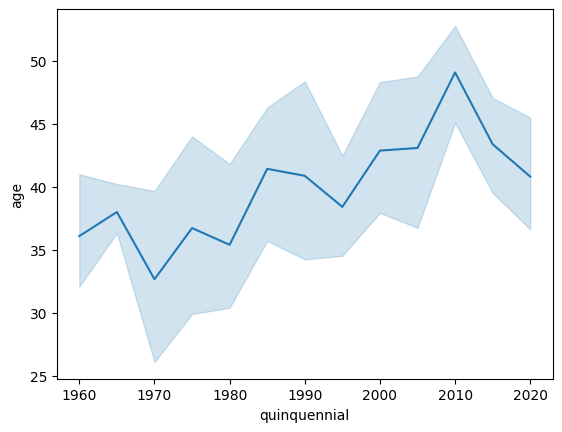

In [10]:
sns.lineplot(data=df, x="quinquennial", y="age")

In [11]:
df_gender = (df[['YEAR', 'GENDER', 'NAME']]
                .groupby(['YEAR', 'GENDER'])
                .agg({'NAME': pd.Series.nunique})
                .rename(columns={'NAME': 'count'})
                .reset_index())

In [12]:
df_gender['cumsum'] = df_gender.groupby('GENDER')['count'].cumsum()

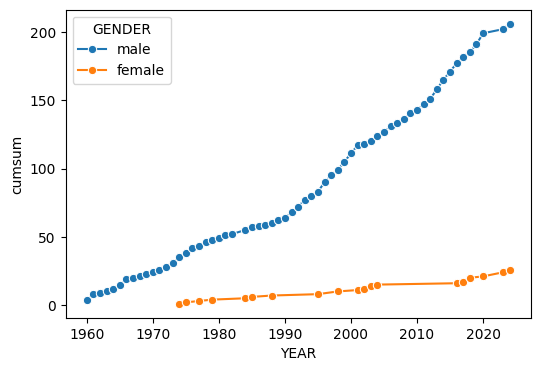

In [13]:
fig ,ax = plt.subplots(figsize = (6,4))
sns.lineplot(data=df_gender, x='YEAR', y='cumsum', hue='GENDER', marker='o')
plt.savefig('../images/gender_line_plot.png', bbox_inches='tight', dpi=300)
plt.show()

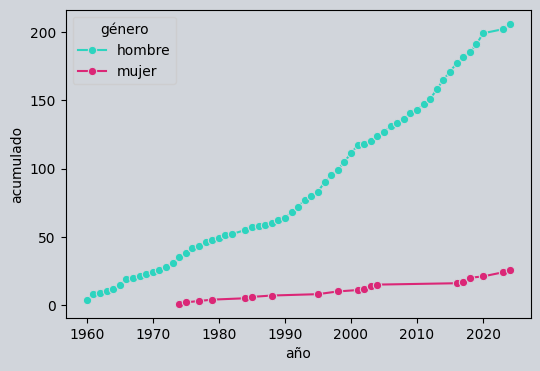

In [14]:
fig ,ax = plt.subplots(figsize = (6,4))
df_gender['GENDER'] = df_gender['GENDER'].replace({'male': 'hombre', 'female': 'mujer'})
palette = {
    'hombre': '#2dd4bf',  # Color para 'hombre'
    'mujer': '#db2777'    # Color para 'mujer'
}
sns.lineplot(data=df_gender, x='YEAR', y='cumsum', hue='GENDER', marker='o', markeredgecolor='#d1d5db', palette=palette)
ax.set_xlabel('año')
ax.set_ylabel('acumulado')
legend = ax.legend(title='género')
fig.patch.set_facecolor('#d1d5db')
ax.set_facecolor('#d1d5db')
legend.get_frame().set_facecolor('#d1d5db')
plt.savefig('../images/gender_line_plot_spanish.png', bbox_inches='tight', dpi=300)
plt.show()

# Wordcloud

Code from [here](https://github.com/bryan-md/wordcloud).

In [57]:
df_jokes = pd.read_csv('../data/jokes.csv')
df_jokes.head()

,routine_id,show_id,event_name,show_name,start_timestamp,text,video_id
0,100,42,Festival Internacional de la Canción de Viña d...,Los Indolatinos,00:03:31,"Oye, fíjate que llega un indio al médico. ¿Qué...",RZYpVSGWkd0
1,100,42,Festival Internacional de la Canción de Viña d...,Los Indolatinos,00:03:59,Venía una delegación de turistas visitando Viñ...,RZYpVSGWkd0
2,100,42,Festival Internacional de la Canción de Viña d...,Los Indolatinos,00:04:35,"Llega un tipo al médico y le dice: Doctor, me ...",RZYpVSGWkd0
3,100,42,Festival Internacional de la Canción de Viña d...,Los Indolatinos,00:05:02,"Conversando con un amigo, uno le dice: En la p...",RZYpVSGWkd0
4,100,42,Festival Internacional de la Canción de Viña d...,Los Indolatinos,00:05:29,"Oye, fíjate que hay un loco haciéndose el lind...",RZYpVSGWkd0


In [31]:
text = ' '.join(df_jokes['text']).lower()


In [68]:
# count number of words in text
words = text.split()
len(words)

230399

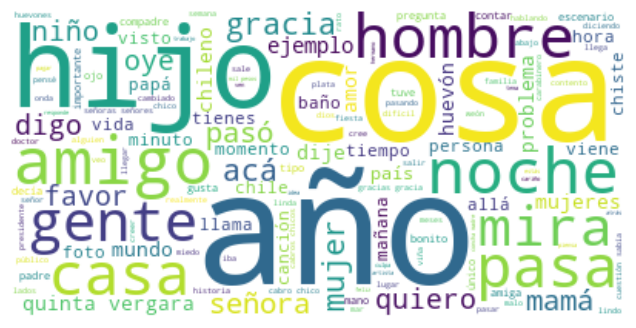

In [38]:
wordcloud = WordCloud(stopwords = STOP_WORDS, background_color='white',
                      collocations=True,
                      min_word_length =3,
                      collocation_threshold=4).generate(text)

text1_dict={k: v for k, v in sorted(wordcloud.process_text(text).items(),reverse=True, key=lambda item: item[1])}

plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [42]:
cand_mask=np.array(Image.open('../images/meruane.png'))
cand_mask=np.where(cand_mask > 3, 255, cand_mask)

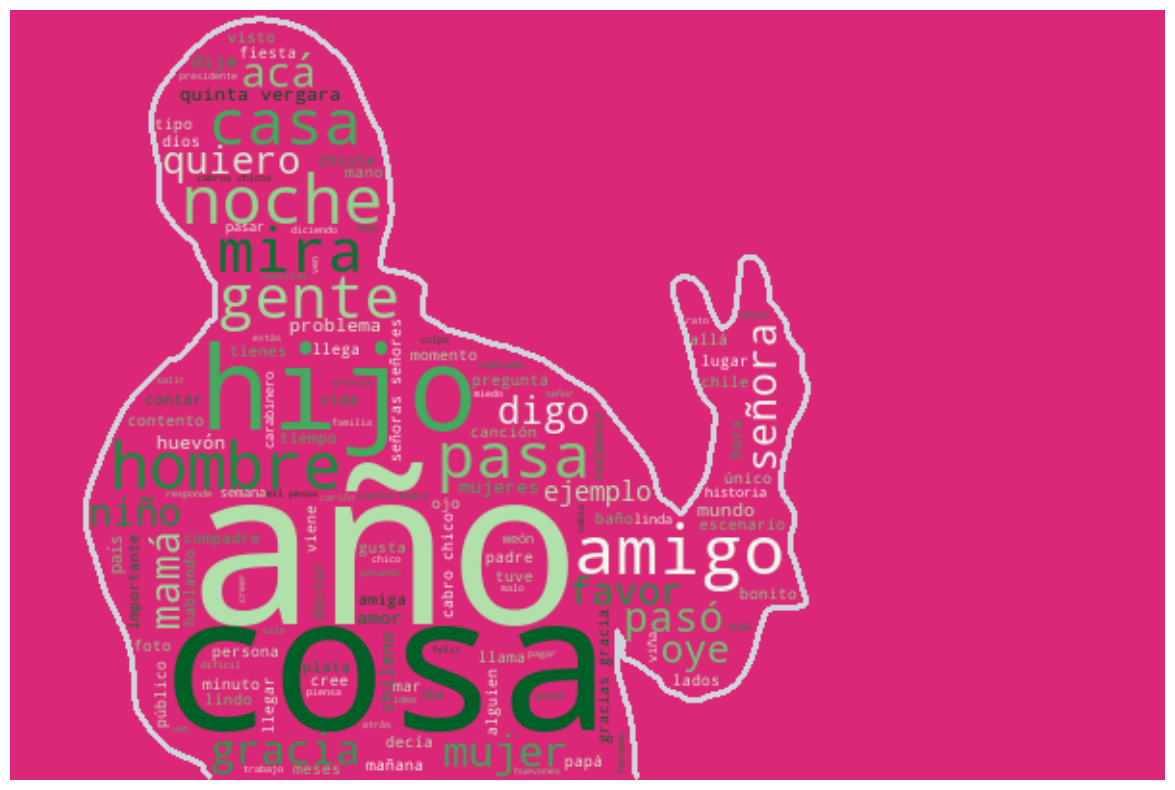

In [51]:
wordcloud = WordCloud(stopwords = STOP_WORDS,
                      background_color='#db2777',#'#d1d5db'
                      collocations=True,
                      min_word_length =3,
                      collocation_threshold=4,
                      contour_color='#d1d5db',#'#db2777'
                      mask=cand_mask,
                      colormap='Greens',
                      contour_width=2
                      ).generate(text)

text1_dict={k: v for k, v in sorted(wordcloud.process_text(text).items(),reverse=True, key=lambda item: item[1])}

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

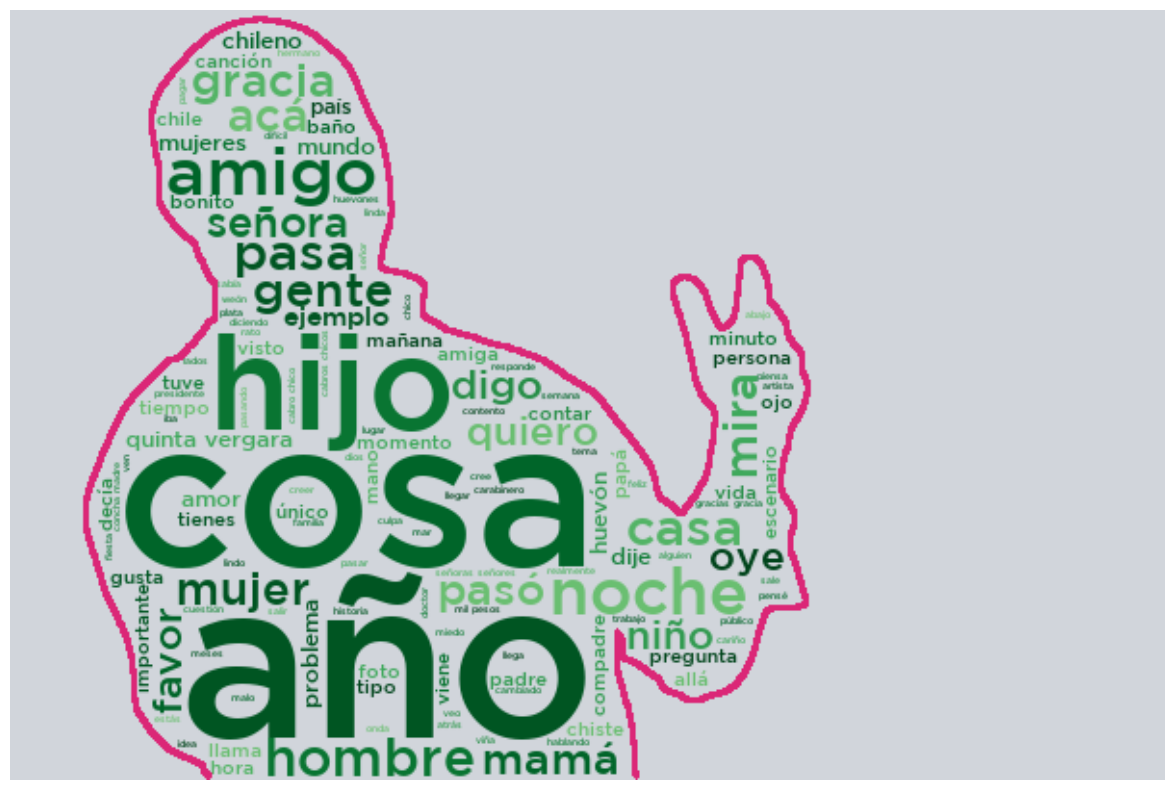

In [67]:
cmap = mpl.cm.Greens(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[-10:,:-1]) # select only a subset of the matrix

wordcloud = WordCloud(font_path = '../fonts/GothamMedium.ttf',
                      stopwords = STOP_WORDS,
                      background_color='#d1d5db',#'#d1d5db'
                      collocations=True,
                      min_word_length =3,
                      collocation_threshold=4,
                      contour_color='#db2777',#'#db2777'
                      mask=cand_mask,
                      colormap=cmap,
                      contour_width=4
                      ).generate(text)

text1_dict={k: v for k, v in sorted(wordcloud.process_text(text).items(),reverse=True, key=lambda item: item[1])}

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()